# Linear Regression - Gradient Descent
![](https://miro.medium.com/max/1793/1*Yz6_Znyv_8yw9uJu87PAjg.png)

#### Table of Content:
- Linear Regression<br/>
    - Normal equation 
    - Using Scikit-Learn
    - Gradient descent
        - batch gradient descent
        - stochastic gradient descent
        - mini-batch gradient descent
- Polynomial Regression

In [3]:
!pip install statsmodels

  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)


You should consider upgrading via the 'c:\users\tdoan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
# import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import copy
import warnings
warnings.filterwarnings("ignore")
# show files
import os
print(os.listdir("input/Lecture_04_2"))

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
# set pyplot parameters to make things pretty
plt.rc('axes', linewidth = 1.5)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('xtick.major', size = 3, width = 1.5)
plt.rc('ytick.major', size = 3, width = 1.5)

# Linear Regression
We will use a simple linearized data to illustrate linear regression. Let's read the data first:

In [3]:
# read data
linearData = pd.read_csv('input/Lecture_04_2/linear.csv')
linearData.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


## Normal equation
Given an input sample $\vec{x}=[x_1, x_2,...,x_n]$, linear regression predicts a $y$ value using the following equation:

<center>
    $\hat{y}=\theta_0+\theta_1 x_1 + \theta_2 x_2 +...+\theta_n x_n$
</center>

Given $m$ training samples $\vec{x}^{(1)}, \vec{x}^{(2)},...,\vec{x}^{(m)}$, linear regression finds $\vec{\theta}$ that minimizes the Mean Square Error (MSE) between $\hat{y}$ and $y$:

<center>
    $MSE(\vec{\theta})=\frac{1}{m}\sum_{i=1}^{m} (\hat{y}^{(i)}-y)^2=\frac{1}{m}\sum_{i=1}^{m} (\vec{\theta}\cdot\vec{x}^{(i)}-y)^2$
</center>

where $y$ is the true value and $\hat{y}$ is the predicted value. The solution of this minimization problem is given by: $\partial MSE/\partial \vec{\theta}=0$, which gives us:

<center>
    $\hat{\vec{\theta}} = (\mathbf{X}^T\cdot \mathbf{X})^{-1}\cdot \mathbf{X}^T\cdot \vec{y}$
</center>

where $\mathbf{X}$ is the input data matrix of size $m \times (n+1)$. Each row of $\mathbf{X}$ corresponds to a sample, each columns corresponds to a feature. There are $(n+1)$ columns since there is a column of 1s added to the $n$ features, corresponding to $\theta_0$. The $\vec{y}$ is a vector of true target values of size $m \times 1$, and $\hat{\vec{\theta}}$ is a vector of size $(n+1) \times 1$.

**The above equation is called the normal equation. The $\hat{\vec{\theta}}$ is the set of parameters that minimizes the cost function of linear regression $MSE(\vec{\theta})$.**

Next we will fit the data we read using the normal equation. Let's first plot the data to see what it looks like:

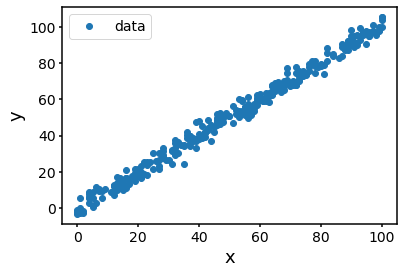

In [4]:
# Let's first plot (x,y) and see what it looks like
plt.plot('x','y',data = linearData, marker = 'o', linestyle = '', label = 'data')
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

Then, use normal equation to solve for the optimizied set of parameters, $\hat{\vec{\theta}}$ (thetaHat):

In [5]:
x = linearData['x'].tolist()
y = linearData['y'].tolist()

# Don't forget - adding ones to the x matrix
xb = np.c_[np.ones((len(x),1)),x]
# calculate linear regression parameters theta using the normal equation
thetaHat = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)

In [6]:
print(thetaHat)
# thetaHat[0] is intercept, thetaHat[1] is slope. This is determined by the column order of matrix xb.

[-0.46181077  1.01433536]


Now that we have $\hat{\vec{\theta}}$, let's plot the fit:

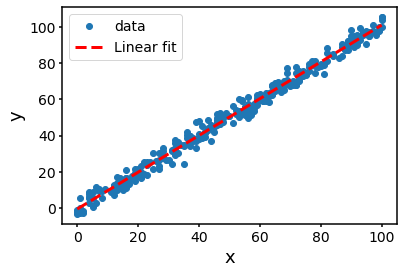

In [7]:
# plot the fit and the data
xFit = np.linspace(0,100,num = 200)
xFitb = np.c_[np.ones((len(xFit),1)), xFit]
yFit = xFitb.dot(thetaHat)

plt.plot('x','y',data = linearData, marker = 'o', linestyle = '', label = 'data')
plt.plot(xFit, yFit, color = 'r', lw = 3, linestyle = '--', label = 'Linear fit')
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

## Using Scikit-Learn
There are many existing packages that can conduct linear regression for you. Here we will introduce **Scikit-Learn's** LinearRegression():

In [8]:
# create the model
lin_reg = LinearRegression()
# format x so that LinearRegression recognize it.
x = np.array(x).reshape(-1,1)
# fit the model
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(-0.4618107736611776, array([1.01433536]))

The "lin_reg = LinearRegression()" created a linear regressor named lin_reg. The "lin_reg.fit(x,y)" fit the regressor to the training data and obtain the best paramters intercept - ($\theta_0$) and slope ($\theta_1$). **This is a common pattern of Scikit-Learn's regressors and classifiers, as you will see throughout the whole tutorial series.**

As you can see, this method gives the same result as the normal equation.  

What if we want some statistics on how significant the fit is? In this case we can use the package **statsmodels** (already imported at the beginning of this notebook):

In [9]:
xb = sm.add_constant(x) # again, add a column of ones to x
model = sm.OLS(y,xb) # OLS = Ordinary Least Squares
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Thu, 30 Apr 2020   Prob (F-statistic):          1.33e-294
Time:                        21:32:08   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4618      0.360     -1.284      0.2

There are several key statistics in the above chart:  
* R-squared: SSR/SST = 1 - SSE/SST, proportion of variance explained. Can increase just because more predictors are added.
* Adj. R-squared: R-squared but counts for the number of predictors. Only increases if model is improved.
* AIC: Akaike information criterion. Learn more at https://en.wikipedia.org/wiki/Akaike_information_criterion
* BIC: Bayesian information criterion. Learn more at https://en.wikipedia.org/wiki/Bayesian_information_criterion  

Here R-squared = Adj. R-squared = 0.989. Therefore we can conclude that the fit is good.

## Gradient Descent:
Another way to do linear regression is to use Gradient Descent (GD). GD is most useful when the cost function (here it is the MSE) does not have a clean and nice analytical solution. But it can also accelerate the training when you have a lot of input features or a large training set. 

**The basic idea of gradient descent is that the cost function decreases most steeply along the the opposite direction of its gradient**. In our case, the cost function is $MSE(\vec{\theta})$. The gradient of $MSE(\vec{\theta})$ over $\vec{\theta}$ is:
<center>
    $\nabla_{\vec{\theta}}MSE(\vec{\theta}) = \frac{2}{m} \mathbf{X}^T \cdot (\mathbf{X}\cdot \vec{\theta}-\vec{y})$
</center>
Again, $m$ is the number of samples in the training set. $\mathbf{X}$ is the input data matrix of size $m \times (n+1)$, $\vec{\theta}$ is the parameter vector of size $(n+1) \times 1$, and $\vec{y}$ is the vector of true target values of size $m \times 1$. **The pseudo algorithm for gradient descent is**:
* Initialize parameter vector $\vec{\theta}$
* Choose learning rate $\mu$
* For each step, update the parameter vector using $\vec{\theta} = \vec{\theta} - \mu \times \nabla_{\vec{\theta}}MSE(\vec{\theta})$. Then update $MSE(\vec{\theta})$ using the updated $\vec{\theta}$.
* Iterate until certain number of steps has passed, or when the decrease of $MSE(\vec{\theta})$ is smaller than a tolerance.

In this section, we will show how to do linear regression with gradient descent. Two tips to keep in mind:
* Make sure all features have similar scale, otherwise the training might take a long time.
* A convex cost function is easy to optimize, but most of the time GD leads to local minima.

### Batch gradient descent:
Batch gradient descent calculates the gradient using all $m$ training samples:
![](https://static.wixstatic.com/media/b8a9a2_f283fc9f4db24befb9c7a9161705c75c~mv2.jpg)

![](https://miro.medium.com/max/4152/1*jxbSOnhAF2huiwSKXTAuLw.png)

In [10]:
learningRate = 0.0002
numIterations = 100000
y = np.array(y).reshape(-1,1)
m = len(y) # number of samples

# random initialization with standard normal distribution
theta = np.random.randn(2,1)

# start gradient descent
for i in range(numIterations):
    gradient = 2/m * xb.T.dot(xb.dot(theta) - y) # dimension: (2,1)
    theta = theta - learningRate * gradient

In [11]:
theta

array([[-0.46179877],
       [ 1.01433518]])

![](https://humanunsupervised.github.io/humanunsupervised.com/topics/images/lesson1/26.png)

Finding the right learning rate is a little tricky here. If you increase the learning rate, you can see theta blowing up and miss the minimum. <br/>
We can also plot the cost function to examine the effects of learning rate:

In [12]:
# define the function to calculate MSE
# can also use sklearn.metrics.mean_squared_error
def MSE(xb,y,theta):
    return np.sum(np.square(xb.dot(theta)-y))/len(y)

In [13]:
learningRate = 0.0002
numIterations = 100000
y = np.array(y).reshape(-1,1)
m = len(y) # number of samples

# random initialization with standard normal distribution
theta = np.random.randn(2,1)

cost = []
# start gradient descent
for i in range(numIterations):
    gradient = 2/m * xb.T.dot(xb.dot(theta) - y) # dimension: (2,1)
    theta = theta - learningRate * gradient
    cost.append(MSE(xb,y,theta))

Text(0, 0.5, 'MSE')

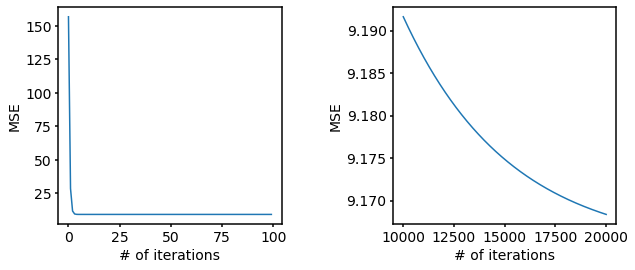

In [14]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].plot(range(0,100),cost[0:100])
ax[1].plot(range(10000,20001), cost[10000:20001])
plt.subplots_adjust(wspace=0.5)
ax[0].set_xlabel('# of iterations', fontsize = 14)
ax[1].set_xlabel('# of iterations', fontsize = 14)
ax[0].set_ylabel('MSE', fontsize = 14)
ax[1].set_ylabel('MSE', fontsize = 14)

As you can see, with learning rate at 0.0002, the MSE steadily decreases with the number of iterations. Now let's try to increase the learning rate a little bit:

Text(0, 0.5, 'MSE')

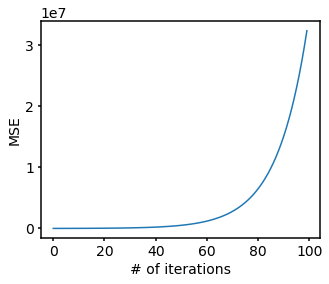

In [15]:
learningRate = 0.0003
numIterations = 100
y = np.array(y).reshape(-1,1)
m = len(y) # number of samples

# random initialization with standard normal distribution
theta = np.random.randn(2,1)

cost = []
# start gradient descent
for i in range(numIterations):
    gradient = 2/m * xb.T.dot(xb.dot(theta) - y) # dimension: (2,1)
    theta = theta - learningRate * gradient
    cost.append(MSE(xb,y,theta))

fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,4))
ax.plot(range(0,100), cost[0:100])
ax.set_xlabel('# of iterations', fontsize = 14)
ax.set_ylabel('MSE', fontsize = 14)

With learning rate at 0.0003, the MSE shoots up with number of iterations.  
This is partly due to using $\mathbf{X}$ matrix without standardizing, which leads to very different scales in the gradient vector.  
We can examine this by looking at the gradient for the first iteration:

In [16]:
theta = np.random.randn(2,1)
gradient = 2/m * xb.T.dot(xb.dot(theta) - y)
print(gradient)

[[  95.36452533]
 [6347.6976774 ]]


You can see that since we did not standardize the $\mathbf{X}$ matrix, gradient in the second direction is much larger than that in the first direction. If the learning rate is not small enough, $\vec{\theta}$ will take a big step in the second direction, potentially leading to cost function increasing instead of decreasing.  
**In practice, if you wish to use gradient descent on regression analysis, it is important to normalzie the input features.**  
When predicting, you will need to scale the input x first **using the same shift and scaling as the training set**, then make a prediction.  
![](https://images.slideplayer.com/38/10783489/slides/slide_36.jpg)

![](https://miro.medium.com/max/1384/0*aR0ivCUZJjM9DFDw.png)

![](https://chrisalbon.com/images/machine_learning_flashcards/Standardization_print.png)

![](https://miro.medium.com/max/3604/1*QjZVCDwW1TMFTWF3rubemQ@2x.png)

![](https://image.slidesharecdn.com/mldatasetpreparation-170913190354/95/machine-learning-dataset-preparation-15-638.jpg?cb=1505329512)

Now, let's try to standardize the input features and run GD again.

In [17]:
xbStandard = copy.deepcopy(xb) # we don't want to mess with xb! xbStandard = xb will lead to xb being normalized, too.
# save the shift and scaling
mu = np.mean(xbStandard[:,1]) 
sigma = np.std(xbStandard[:,1])
# standardization
xbStandard[:,1]=(xbStandard[:,1]-mu)/sigma
print(xbStandard[0:5])
print(mu)
print(sigma)

[[ 1.          0.91589319]
 [ 1.         -1.05200623]
 [ 1.         -1.01686517]
 [ 1.         -1.08714729]
 [ 1.         -0.52489032]]
50.93666666666667
28.456738901161685


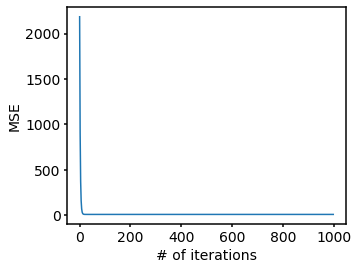

In [18]:
learningRate = 0.1
numIterations = 1000

m = len(y) # number of samples

# random initialization with standard normal distribution
theta = np.random.randn(2,1)

cost = []
# start gradient descent
for i in range(numIterations):
    gradient = 2/m * xbStandard.T.dot(xbStandard.dot(theta) - y) # dimension: (2,1)
    theta = theta - learningRate * gradient
    cost.append(MSE(xbStandard,y,theta))

fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,4))
plt.plot(cost)
ax.set_xlabel('# of iterations', fontsize = 14)
ax.set_ylabel('MSE', fontsize = 14)
plt.show()

In [19]:
print(theta)
#Compare to [-0.46181077  1.01433536] 
# and keep in mind that our feature has been standardized 
# with mean 50.93666666666667 and std 28.456738901161685

[[51.2050511 ]
 [28.86467636]]


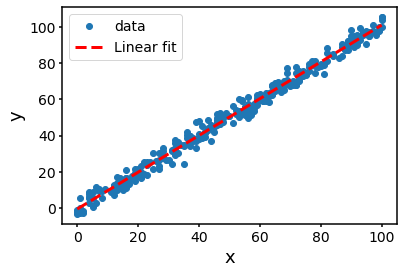

In [20]:
xFit = np.linspace(0,100,num = 200)
xFitStandard = (xFit - mu)/sigma # use the previously saved mean and standard deviation
xFitStandardb = np.c_[np.ones((len(xFitStandard),1)), xFitStandard]
yFit = xFitStandardb.dot(theta)

plt.plot('x','y',data = linearData, marker = 'o', linestyle = '', label = 'data')
plt.plot(xFit, yFit, color = 'r', lw = 3, linestyle = '--', label = 'Linear fit')
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

With much larger learning rate and much fewer iterations, we have achieved satisfying linear fit of the data!  
The following examples will go back to using the original data, but in practice input features should be standardized for all GD problems.

## Stochastic Gradient Descent
![](https://qph.fs.quoracdn.net/main-qimg-1f328d91d2fe7cee9719ce1870ed54dd.webp)

![](https://helloacm.com/wp-content/uploads/2017/05/stochastic-gradient-descent.jpg)

### Stochastic Gradient Descent
Stochastic Gradient Descent (SGD) use one sample at a time to calculate gradient. Instead of trying to decrease $MSE(\vec{\theta})$ of all samples ($\frac{1}{m}\sum_{i=1}^{m} (\hat{y}^{(i)}-y)^2$) at each step, SGD tries to decrease $MSE(\vec{\theta})$ of one randomly selected sample ($(\hat{y}^{(i)}-y)^2$, $i$ is randomly selected) at each step. The gradient term at each step becomes:
<center>
    $2\times \vec{x}^{(i)T} \cdot (\vec{x}^{(i)}\cdot \vec{\theta}-y^{(i)})$
</center>

**There are several terminologies and concepts that I will be using in the following code:**
* Simulated annealing: gradually decrease learning rate. A common technique in SGD to help it reach the minima toward the end of the learning period.
* Learning Schedule: the function that determines how learning rate changes with iterations.
* Epochs: the number of rounds of $m$ iterations to run (see code below).

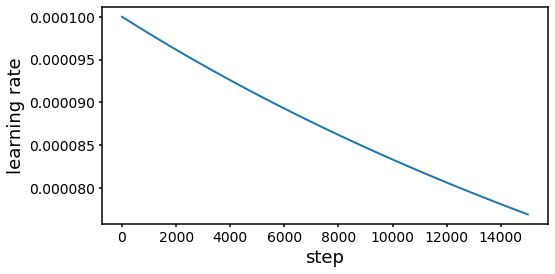

In [21]:
numEpochs = 1000

# a simple learning schedule
def learningSchedule(step):
    return 5/(50000 + step)

# visualize the learning schedule
s = np.linspace(0,15000, num = 15001)
l = learningSchedule(s)
m = len(y) # sample size 

fig, ax = plt.subplots(figsize = (8,4))
plt.plot(s,l, lw = 2)
#plt.xlim(0,15000)
plt.xlabel('step', fontsize = 18)
plt.ylabel('learning rate', fontsize = 18)
plt.show()

In [22]:
theta = np.random.randn(2,1)

cost = []
for epoch in range(numEpochs):
    for i in range(m):
        idx = np.random.randint(m) # 0,1,...,m-1
        xbi = xb[idx:idx+1]
        yi = y[idx:idx+1]
        gradient = 2*xbi.T.dot(xbi.dot(theta)-yi) # sample size is one
        learningRate = learningSchedule(epoch*m + i) # step = epoch*m + i
        theta = theta - learningRate * gradient
        cost.append(MSE(xb,y,theta))

In [23]:
print(theta)

[[-0.4640465 ]
 [ 1.01033453]]


Not bad. But note that with SGD, due to the random nature of the algorithm, $\vec{\theta}$ will be hopping around the optimized value. Simulated annealing (mentioned above) can help with this issue.  
We can plot the cost function (MSE) to see what it looks like:

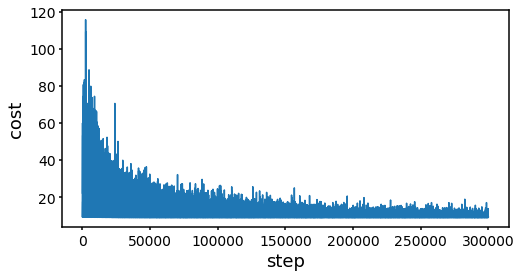

In [24]:
fig, ax = plt.subplots(figsize = (8,4))
plt.plot(cost)
#plt.xlim(0,20000)
plt.ylabel('cost', fontsize = 18)
plt.xlabel('step', fontsize = 18)
plt.show()

You can see that MSE has some fluctuations, but in general it is decreasing.  
Again, if the learning rate starts off too high, the cost function will overshoot:

In [25]:
numEpochs = 100

# a simple learning schedule
def learningSchedule(step):
    return 5/(10000 + step)

theta = np.random.randn(2,1)

cost = []
for epoch in range(numEpochs):
    for i in range(m):
        idx = np.random.randint(m) # 0,1,...,m-1
        xbi = xb[idx:idx+1]
        yi = y[idx:idx+1]
        gradient = 2*xbi.T.dot(xbi.dot(theta)-yi) # sample size is one
        learningRate = learningSchedule(epoch*m + i) # step = epoch*m + i
        theta = theta - learningRate * gradient
        cost.append(MSE(xb,y,theta))

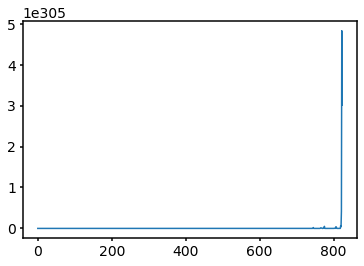

In [26]:
plt.plot(cost)
plt.show()

You can also run SGD using **Scikit-Learn**'s SGDRegressor():

In [27]:
from sklearn.linear_model import SGDRegressor

In [28]:
# max_iter is the total number of epochs, eta0 is the starting learning rate
# penalty = None, meaning there is no regularization.
model = SGDRegressor(eta0 = 0.0005, penalty = None, max_iter = 10000)
model.fit(x,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [29]:
model.intercept_, model.coef_

(array([-0.22793942]), array([1.01570851]))

### Mini-batch Gradient Descent
Mini-batch gradient descent is somewhere between batch gradient descent and stochastic gradient descent.  
For each iteration, you caluclate gradient based on a random selected sub-sample of the training set, not all of them (batch GD), nor only one of them (stochastic GD).
![](https://i2.wp.com/nttuan8.com/wp-content/uploads/2019/04/toward_minimum.png?resize=522%2C258&ssl=1)
![](https://www.i2tutorials.com/wp-content/uploads/2019/09/Neural-network-18-i2tutorials.png)

In [30]:
from sklearn.utils import shuffle

In [31]:
batchsize = 30 # size of each of the mini batch
theta = np.random.randn(2,1)

numEpochs = 5000
learningRate = 0.0002

for epoch in range(numEpochs):
    xbShuffled, yShuffled = shuffle(xb, y) # shuffle your dataset at the beginning of each epoch.
    for i in range(0, xbShuffled.shape[0], batchsize):
        xbi = xbShuffled[i:i+batchsize]
        yi = yShuffled[i:i+batchsize]
        gradient = 2/batchsize*xbi.T.dot(xbi.dot(theta)-yi)
        theta = theta - learningRate*gradient
        

In [32]:
print(theta)

[[-0.45009566]
 [ 1.01318472]]


# Polynomial Regression
![](https://miro.medium.com/max/857/1*WspeVEbpVEL08AUT-ponEw.png)
![](https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png)
The above simple linear regression model can be easily extended to a polynomial regression model. To illustrate polynomial regression, we will use another dataset:

In [33]:
# read data
advancedData = pd.read_csv('input/Lecture_04_2/advanced.csv')
advancedData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


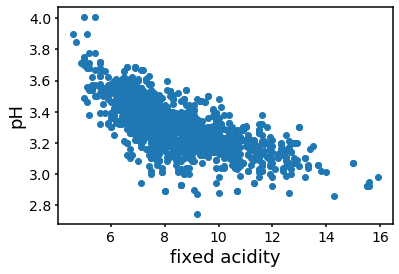

In [34]:
plt.plot('fixed acidity','pH', data = advancedData, marker = 'o', linestyle = '') # fixed acidity, pH
plt.xlabel('fixed acidity', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()

Looks like a good enough dataset to try polynomial regression on.  
But first, let's see how linear fit performs on this data.

In [35]:
reg = LinearRegression()
x = advancedData['fixed acidity'].to_numpy().reshape(-1,1)
y = advancedData['pH'].to_numpy().reshape(-1,1)
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

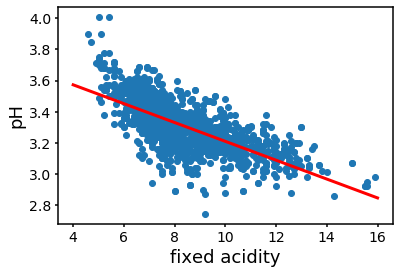

In [36]:
xFit = np.linspace(4,16,num=100).reshape(-1,1)
yFit = reg.predict(xFit)
plt.plot('fixed acidity','pH', data = advancedData, marker = 'o', linestyle = '') 
plt.plot(xFit,yFit, color = 'r',lw=3)
plt.xlabel('fixed acidity', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()

In [37]:
# compute MSE
xb = np.c_[np.ones((len(x),1)),x]
theta = np.array([reg.intercept_[0],reg.coef_[0][0]]).reshape(-1,1)

linMSE = MSE(xb,y,theta)
print(linMSE)

0.012709087835248862


Now, let's try a second degree polynomial fit. To transform data to include polynomial features, we will use Scikit-Learn's PolynomialFeatures():

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly = PolynomialFeatures(degree=2, include_bias = False)
xPoly = poly.fit_transform(x)
print(xPoly[0:5])

[[  7.4   54.76]
 [  7.8   60.84]
 [  7.8   60.84]
 [ 11.2  125.44]
 [  7.4   54.76]]


The "fit_transform" function just transforms the orginal data $x$ to include second-order features. As you can see, xPoly's first column contains the original data, and xPoly's second column contains the second-order features.

We then conduct polynomial fit: $y = a + b x + c x^2$

In [40]:
reg = LinearRegression()
reg.fit(xPoly,y)
print(reg.intercept_, reg.coef_)

[4.34821937] [[-0.18225037  0.00663222]]


In [41]:
xFit=np.linspace(4,16,num=100).reshape(-1,1)
xFit=poly.fit_transform(xFit)
#print(xFit[0:5])
yFit = reg.predict(xFit)

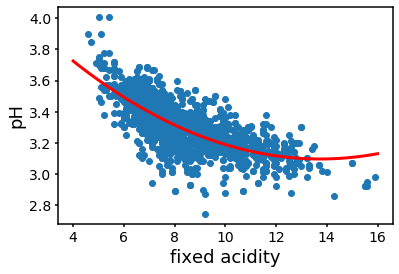

In [42]:
plt.plot('fixed acidity','pH', data = advancedData, marker = 'o', linestyle = '') 
plt.plot(xFit[:,0],yFit, color = 'r',lw=3)
plt.xlabel('fixed acidity', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()

In [43]:
# compute MSE
xb = np.c_[np.ones((len(x),1)),xPoly]
theta = np.array([reg.intercept_[0],reg.coef_[0][0],reg.coef_[0][1]]).reshape(-1,1)

polyMSE = MSE(xb,y,theta)
print(polyMSE)

0.011836731145634345


The MSE is smaller than the first-degree linear regression by ~0.001 (~8.5%), a small improvement. <br/>
What if we do polynomial degree = 20?

In [44]:
poly = PolynomialFeatures(degree=20, include_bias = False)
xPoly = poly.fit_transform(x)
#print(xPoly[0:1])

reg = LinearRegression()
reg.fit(xPoly,y)

xFit = np.linspace(4,16,num=100).reshape(-1,1)
xFit = poly.fit_transform(xFit)
yFit = reg.predict(xFit)

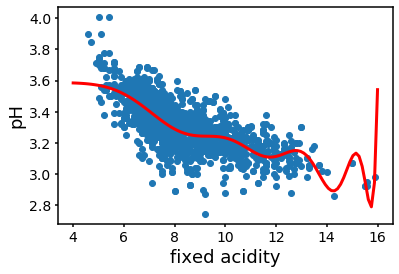

In [45]:
plt.plot('fixed acidity','pH', data = advancedData, marker = 'o', linestyle = '') 
plt.plot(xFit[:,0],yFit, color = 'r',lw=3)
plt.xlabel('fixed acidity', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()

This 20-degree polynomial model is overfitting, as you can see it trying to wiggle through as many data points as possible.  
A good way to reduce overfitting is regularization, which will be introduced in next section.